In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", 50)
import requests
import json
import time
import random

In [89]:
%%capture
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()

In [90]:
compiled_list = []

#def page
try:
    file = open('data/tmdbdata.json', 'r')
    compiled_list = json.load(file)
    file.close()
except:
    for n in tqdm(list(range(1,399))):
        url='https://api.themoviedb.org/3/movie/top_rated?api_key=0e72c0b2b11293a6390e9f7b472aec2b&language=en-US&page={}'.format(n)
        r = requests.get(url)
        data = r.json()
        compiled_list.append(data)
        time.sleep(random.choice([1,2]))
    
    file = open('data/tmdbdata.json', 'w')
    json.dump(compiled_list, file)
    file.close()

In [91]:
movies = []
for page in compiled_list:
    movies += page['results']
movies

[{'popularity': 11.995,
  'id': 724089,
  'video': False,
  'vote_count': 920,
  'vote_average': 8.9,
  'title': "Gabriel's Inferno Part II",
  'release_date': '2020-07-31',
  'original_language': 'en',
  'original_title': "Gabriel's Inferno Part II",
  'genre_ids': [10749],
  'backdrop_path': '/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg',
  'adult': False,
  'overview': "Professor Gabriel Emerson finally learns the truth about Julia Mitchell's identity, but his realization comes a moment too late. Julia is done waiting for the well-respected Dante specialist to remember her and wants nothing more to do with him. Can Gabriel win back her heart before she finds love in another's arms?",
  'poster_path': '/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg'},
 {'popularity': 12.45,
  'vote_count': 1529,
  'video': False,
  'poster_path': '/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg',
  'id': 696374,
  'adult': False,
  'backdrop_path': '/969BfPHGJcjg2aUv60g5uiiXFzf.jpg',
  'original_language': 'en',
  'original_title': "Gabriel

In [92]:
df = pd.DataFrame(movies)
df.head()

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,backdrop_path,adult,overview,poster_path
0,11.995,724089,False,920,8.9,Gabriel's Inferno Part II,2020-07-31,en,Gabriel's Inferno Part II,[10749],/jtAI6OJIWLWiRItNSZoWjrsUtmi.jpg,False,Professor Gabriel Emerson finally learns the t...,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
1,12.450,696374,False,1529,8.8,Gabriel's Inferno,2020-05-29,en,Gabriel's Inferno,[10749],/969BfPHGJcjg2aUv60g5uiiXFzf.jpg,False,An intriguing and sinful exploration of seduct...,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
2,23.172,644479,False,256,8.7,Dedicated to my ex,2019-11-01,es,Dedicada a mi ex,"[35, 18]",/8g1rUabKleLvovt0Sx6bXgWfC42.jpg,False,"The film tells the story of Ariel, a 21-year-o...",/riAooJrFvVhotyaOgoI0WR7okSe.jpg
3,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[18, 80]",/iNh3BivHyg5sQRPP1KOkzguEX0H.jpg,False,Framed in the 1940s for the double murder of h...,/5KCVkau1HEl7ZzfPsKAPM0sMiKc.jpg
4,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[35, 18, 10749]",/svYzz6A6xleZv5toTLAhigXd1DX.jpg,False,"Raj is a rich, carefree, happy-go-lucky second...",/2CAL2433ZeIihfX1Hb2139CX0pW.jpg


In [93]:
genre = {28: 'Action', 12: "Adventure", 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [94]:
genre

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [95]:
for g_id in df['genre_ids']:
    for g in g_id:
        if g not in genre.keys():
            print(g)

In [96]:
df['genre_ids'] = df['genre_ids'].apply(lambda g_id: [genre[g] for g in g_id])

In [97]:
df['genre_ids']

0                                               [Romance]
1                                               [Romance]
2                                         [Comedy, Drama]
3                                          [Drama, Crime]
4                                [Comedy, Drama, Romance]
                              ...                        
7935         [Adventure, Horror, Action, Science Fiction]
7936                  [Action, Science Fiction, Thriller]
7937                  [Action, Adventure, Comedy, Family]
7938    [Fantasy, Drama, Horror, Action, Thriller, Sci...
7939                                             [Comedy]
Name: genre_ids, Length: 7940, dtype: object

In [98]:
top = pd.read_csv('top_1000_by_us_box_office.csv')

In [99]:
top

,Unnamed: 0,movie,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us
0,0,Star Wars: Episode VII - The Force Awakens,2015,PG-13,2488496,138,"Action, Adventure, Sci-Fi",80.0,7.9,850403,936.66
1,1,Avengers: Endgame,2019,PG-13,4154796,181,"Action, Adventure, Drama",78.0,8.4,777584,858.37
2,2,Avatar,2009,PG-13,499549,162,"Action, Adventure, Fantasy",83.0,7.8,1107952,760.51
3,3,Avengers: Infinity War,2018,PG-13,4154756,149,"Action, Adventure, Sci-Fi",68.0,8.4,811045,678.82
4,4,Titanic,1997,PG-13,120338,194,"Drama, Romance",75.0,7.8,1031257,659.33
...,...,...,...,...,...,...,...,...,...,...,...
995,995,Freaks,1932,Not Rated,22913,64,"Drama, Horror",80.0,7.9,41658,NaN
996,996,Frankenstein,1931,Passed,21884,70,"Drama, Horror, Sci-Fi",91.0,7.8,64478,NaN
997,997,The Circus,1928,Passed,18773,72,"Comedy, Romance",90.0,8.1,28932,NaN
998,998,Nosferatu,1922,Not Rated,13442,94,"Fantasy, Horror",NaN,7.9,87788,NaN


In [100]:
combined = pd.merge(df, top, left_on = 'title', right_on = 'movie')

In [101]:
combined

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,movie,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,The Shawshank Redemption,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,"[Comedy, Drama, Romance]",...,Dilwale Dulhania Le Jayenge,1995,Not Rated,112870,181,"Drama, Romance",NaN,8.1,62564,NaN
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,The Godfather,1972,R,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,Schindler's List,1993,R,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,Your Name.,2016,PG,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,Snow White and the Seven Dwarfs,1937,Approved,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,Silver Linings Playbook,2012,R,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09
974,17.416,1900,False,1292,7.1,Traffic,2000-03-23,en,Traffic,"[Crime, Drama, Thriller]",...,Traffic,2000,R,181865,147,"Crime, Drama, Thriller",86.0,7.6,194201,124.12
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,"[Fantasy, Mystery, Thriller]",...,Death Note,2006,Not Rated,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN


In [102]:
combined.dropna(subset = ['gross_us'])

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,movie,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,The Shawshank Redemption,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,The Godfather,1972,R,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,Schindler's List,1993,R,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,Your Name.,2016,PG,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02
5,38.426,240,False,7845,8.6,The Godfather: Part II,1974-12-20,en,The Godfather: Part II,"[Drama, Crime]",...,The Godfather: Part II,1974,R,71562,202,"Crime, Drama",90.0,9.0,1110803,57.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,27.580,23483,False,8928,7.1,Kick-Ass,2010-03-22,en,Kick-Ass,"[Action, Crime]",...,Kick-Ass,2010,R,1250777,117,"Action, Comedy, Crime",66.0,7.6,520563,48.07
971,27.082,508,False,4452,7.1,Love Actually,2003-09-07,en,Love Actually,"[Comedy, Romance, Drama]",...,Love Actually,2003,R,314331,135,"Comedy, Drama, Romance",55.0,7.6,418267,59.70
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,Snow White and the Seven Dwarfs,1937,Approved,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,Silver Linings Playbook,2012,R,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09


In [103]:
combined['month'] = combined['release_date'].apply(lambda m: m[5:7])

In [104]:
df.dtypes

popularity           float64
id                     int64
video                   bool
vote_count             int64
vote_average         float64
title                 object
release_date          object
original_language     object
original_title        object
genre_ids             object
backdrop_path         object
adult                   bool
overview              object
poster_path           object
dtype: object

In [105]:
combined['year'] = combined['year'].apply(lambda x: int(x))

In [106]:
combined['month'] = combined['month'].apply(lambda x: int(x))

In [107]:
combined.groupby(['month'])['gross_us'].mean()

month
1      24.320333
2      59.911961
3      46.200714
4     107.173750
5      70.628806
6      94.573875
7     105.904667
8      56.038983
9      31.521900
10     59.998750
11     95.561690
12     88.449664
Name: gross_us, dtype: float64

In [108]:
combined.dropna(subset = ['month', 'gross_us'])

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us,month
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,"[Drama, Crime]",...,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34,9
2,48.154,238,False,13224,8.7,The Godfather,1972-03-14,en,The Godfather,"[Drama, Crime]",...,1972,R,68646,175,"Crime, Drama",100.0,9.2,1589870,134.97,3
3,31.382,424,False,10522,8.6,Schindler's List,1993-11-30,en,Schindler's List,"[Drama, History, War]",...,1993,R,108052,195,"Biography, Drama, History",94.0,8.9,1195308,96.90,11
4,130.760,372058,False,6590,8.6,Your Name.,2016-08-26,ja,君の名は。,"[Romance, Animation, Drama]",...,2016,PG,5311514,106,"Animation, Drama, Fantasy",79.0,8.4,185261,5.02,8
5,38.426,240,False,7845,8.6,The Godfather: Part II,1974-12-20,en,The Godfather: Part II,"[Drama, Crime]",...,1974,R,71562,202,"Crime, Drama",90.0,9.0,1110803,57.30,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,27.580,23483,False,8928,7.1,Kick-Ass,2010-03-22,en,Kick-Ass,"[Action, Crime]",...,2010,R,1250777,117,"Action, Comedy, Crime",66.0,7.6,520563,48.07,3
971,27.082,508,False,4452,7.1,Love Actually,2003-09-07,en,Love Actually,"[Comedy, Romance, Drama]",...,2003,R,314331,135,"Comedy, Drama, Romance",55.0,7.6,418267,59.70,9
972,43.190,408,False,5349,7.1,Snow White and the Seven Dwarfs,1937-12-21,en,Snow White and the Seven Dwarfs,"[Fantasy, Animation, Family]",...,1937,Approved,29583,83,"Animation, Family, Fantasy",95.0,7.6,178953,184.93,12
973,25.080,82693,False,9174,7.1,Silver Linings Playbook,2012-09-08,en,Silver Linings Playbook,"[Drama, Comedy, Romance]",...,2012,R,1045658,122,"Comedy, Drama, Romance",81.0,7.7,654849,132.09,9


In [109]:
month = set(combined['month'])
month

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [110]:
combined.groupby(['month'])['vote_average'].mean()

month
1     7.576923
2     7.651613
3     7.587692
4     7.729167
5     7.692105
6     7.698969
7     7.593151
8     7.441791
9     7.635652
10    7.625225
11    7.645783
12    7.646809
Name: vote_average, dtype: float64

In [111]:
table = combined.groupby(['month']).mean().loc[:,['popularity', 'vote_count', 'vote_average']]
table

,popularity,vote_count,vote_average
month,,,
1,18.327795,1707.564103,7.576923
2,23.510081,3660.596774,7.651613
3,20.340908,3035.353846,7.587692
4,32.770854,4377.750000,7.729167
5,27.784053,3821.868421,7.692105
6,25.894000,3640.309278,7.698969
7,31.536425,4529.506849,7.593151
8,25.750761,2594.597015,7.441791
9,28.349174,2766.608696,7.635652


In [112]:
# combined.to_csv('comined.csv')

In [113]:
#group by month ---> genres ---> revenue

In [114]:
# combined.groupby(['month', 'genre']).agg(['gross_us'])

In [115]:
combo = combined.explode('genre_ids')
combo

,popularity,id,video,vote_count,vote_average,title,release_date,original_language,original_title,genre_ids,...,year,pg_rating,imdb_id,runtime,genre,metascore,imdb_rating,votes,gross_us,month
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,Drama,...,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34,9
0,57.280,278,False,17472,8.7,The Shawshank Redemption,1994-09-23,en,The Shawshank Redemption,Crime,...,1994,R,111161,142,Drama,80.0,9.3,2303591,28.34,9
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,Comedy,...,1995,Not Rated,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,Drama,...,1995,Not Rated,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10
1,17.364,19404,False,2418,8.7,Dilwale Dulhania Le Jayenge,1995-10-20,hi,दिलवाले दुल्हनिया ले जायेंगे,Romance,...,1995,Not Rated,112870,181,"Drama, Romance",NaN,8.1,62564,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,Mystery,...,2006,Not Rated,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,6
975,26.011,16007,False,386,6.9,Death Note,2006-06-17,ja,デスノート,Thriller,...,2006,Not Rated,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,6
976,28.942,351460,False,3031,4.2,Death Note,2017-08-25,en,Death Note,Fantasy,...,2006,Not Rated,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,8
976,28.942,351460,False,3031,4.2,Death Note,2017-08-25,en,Death Note,Horror,...,2006,Not Rated,758742,126,"Crime, Drama, Fantasy",NaN,7.7,28387,NaN,8


In [116]:
combo.groupby(['month', 'genre_ids'])['gross_us'].value_counts()
#(normalize=True)[:,'F'].sort_values(ascending = False) 

month  genre_ids  gross_us
1      Action     0.03        1
                  24.63       1
                  57.37       1
                  111.11      1
       Adventure  0.54        1
                             ..
12     Western    54.12       1
                  56.51       1
                  162.81      1
                  171.24      1
                  183.64      1
Name: gross_us, Length: 2092, dtype: int64

In [117]:
# genre = {28: 'Action', 12: "Adventure", 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

In [118]:
# genre

In [119]:
# combined.sort_values(by = ['month', 'genre'])

In [120]:
combo.groupby(['month', 'genre_ids'])['gross_us'].value_counts()

month  genre_ids  gross_us
1      Action     0.03        1
                  24.63       1
                  57.37       1
                  111.11      1
       Adventure  0.54        1
                             ..
12     Western    54.12       1
                  56.51       1
                  162.81      1
                  171.24      1
                  183.64      1
Name: gross_us, Length: 2092, dtype: int64

In [121]:
combo.groupby(['month', 'genre_ids'])['gross_us'].median()

month  genre_ids      
1      Action              41.000
       Adventure            5.010
       Comedy               1.830
       Crime               17.915
       Drama                5.740
                           ...   
12     Romance             82.230
       Science Fiction    190.240
       Thriller            34.600
       War                 44.820
       Western             55.315
Name: gross_us, Length: 199, dtype: float64

In [122]:
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].median()
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].mean()

In [123]:
month_genre_popularity = combo.groupby(['month', 'genre_ids'])['popularity'].mean()

In [48]:
month_genre_popularity.head(20)

month  genre_ids      
1      Action             30.452286
       Adventure          15.659667
       Comedy             19.966000
       Crime              31.583167
       Drama              15.890167
       History            15.175667
       Horror             12.946750
       Music              18.164000
       Mystery            20.232000
       Romance            12.287875
       Science Fiction    25.031500
       Thriller           16.922400
       War                16.413600
       Western            20.687500
2      Action             41.025667
       Adventure          52.150800
       Animation          42.278500
       Comedy             23.477273
       Crime              18.729125
       Drama              18.054463
Name: popularity, dtype: float64

In [49]:
month_genre_popularity = month_genre_popularity.unstack().transpose()

In [50]:
month_genre_rating = combo.groupby(['month', 'genre_ids'])['imdb_rating'].mean()

In [51]:
combo.groupby(['month', 'genre_ids'])['imdb_rating']

In [52]:
month_genre_rating.head(20)

month  genre_ids      
1      Action             7.814286
       Adventure          7.900000
       Comedy             7.972727
       Crime              7.750000
       Drama              7.866667
       History            7.916667
       Horror             7.800000
       Music              7.900000
       Mystery            7.700000
       Romance            7.887500
       Science Fiction    7.650000
       Thriller           7.750000
       War                7.860000
       Western            8.100000
2      Action             7.922222
       Adventure          7.960000
       Animation          7.783333
       Comedy             7.945455
       Crime              7.975000
       Drama              7.973171
Name: imdb_rating, dtype: float64

In [53]:
# month_genre_rating.plot.bar()

In [54]:
# fig, ax = plt.subplots(figsize=(12, 7))
# sns.boxplot(x="month", y = "vote_average", data = combo, palette="Set3").set(title = 
#                                         'Rating for each Genre', xlabel = 'Genre', ylabel = 'Rating')
# plt.xticks(rotation=45)
# # plt.title('Ratings for each Genre', fontsize = 20)
# # ax.set_xlabel('Genre', fontsize = 14)
# # ax.set_ylabel('Average Vote', fontsize = 14)

# plt.savefig('month_genres_rating_boxplot')

In [55]:
# fig, ax = plt.subplots(figsize=(12, 7))
# x = df.groupby('genre_ids')['vote_average'].mean().index
# y = df.groupby('genre_ids')['vote_average'].mean().values
# ax.bar(x,y, color = ['dodgerblue','gray', 'mediumspringgreen'])
# plt.xticks(rotation=45)
# ax.set_title('Ratings for each Genre', fontsize = 20)
# ax.set_xlabel('Genre', fontsize = 14)
# ax.set_ylabel('Average Vote', fontsize = 14)


# plt.savefig('genres_month_rating_bargraph')

# combo.groupby(['month', 'genre_ids'])['imdb_rating'].mean().unstack().plot.bar()
month_genre_rating = combo.groupby(['month', 'genre_ids'])['imdb_rating'].mean().unstack().transpose()
month_genre_rating

month,1,2,3,4,5,6,7,8,9,10,11,12
genre_ids,,,,,,,,,,,,
Action,7.814286,7.922222,7.850000,8.035294,7.940000,7.835714,8.066667,7.861538,7.894118,7.841667,8.033333,8.019231
Adventure,7.900000,7.960000,7.858333,7.981818,7.894444,7.835000,8.016667,7.808333,7.836364,7.818182,7.921429,7.984615
Animation,NaN,7.783333,8.033333,8.350000,8.100000,7.912500,7.916667,7.980000,8.000000,7.900000,7.869231,7.900000
Comedy,7.972727,7.945455,7.876923,7.921429,7.917647,7.872000,7.963158,7.870000,7.784211,7.952632,7.881250,7.916129
Crime,7.750000,7.975000,7.911765,7.900000,8.100000,7.928571,8.077778,7.881250,7.993103,7.940000,7.950000,7.959259
Drama,7.866667,7.973171,7.932500,7.992593,7.934884,7.968333,7.966667,7.885714,7.905435,7.939744,8.018519,7.949107
Family,NaN,7.760000,8.033333,7.800000,7.900000,7.925000,8.027273,7.887500,8.100000,7.950000,7.822222,7.883333
Fantasy,NaN,7.900000,7.940000,7.800000,7.900000,7.790000,7.984615,7.800000,7.900000,7.957143,7.875000,8.120000
History,7.916667,7.950000,7.766667,8.033333,8.000000,7.950000,8.225000,NaN,8.069231,7.962500,8.020000,7.905556


In [56]:
month_genre_rating.reset_index()

month,genre_ids,1,2,3,4,5,6,7,8,9,10,11,12
0,Action,7.814286,7.922222,7.850000,8.035294,7.940000,7.835714,8.066667,7.861538,7.894118,7.841667,8.033333,8.019231
1,Adventure,7.900000,7.960000,7.858333,7.981818,7.894444,7.835000,8.016667,7.808333,7.836364,7.818182,7.921429,7.984615
2,Animation,NaN,7.783333,8.033333,8.350000,8.100000,7.912500,7.916667,7.980000,8.000000,7.900000,7.869231,7.900000
3,Comedy,7.972727,7.945455,7.876923,7.921429,7.917647,7.872000,7.963158,7.870000,7.784211,7.952632,7.881250,7.916129
4,Crime,7.750000,7.975000,7.911765,7.900000,8.100000,7.928571,8.077778,7.881250,7.993103,7.940000,7.950000,7.959259
5,Drama,7.866667,7.973171,7.932500,7.992593,7.934884,7.968333,7.966667,7.885714,7.905435,7.939744,8.018519,7.949107
6,Family,NaN,7.760000,8.033333,7.800000,7.900000,7.925000,8.027273,7.887500,8.100000,7.950000,7.822222,7.883333
7,Fantasy,NaN,7.900000,7.940000,7.800000,7.900000,7.790000,7.984615,7.800000,7.900000,7.957143,7.875000,8.120000
8,History,7.916667,7.950000,7.766667,8.033333,8.000000,7.950000,8.225000,NaN,8.069231,7.962500,8.020000,7.905556
9,Horror,7.800000,7.942857,7.866667,7.766667,7.966667,8.000000,7.600000,7.700000,7.900000,7.810000,7.833333,8.000000


<BarContainer object of 17 artists>

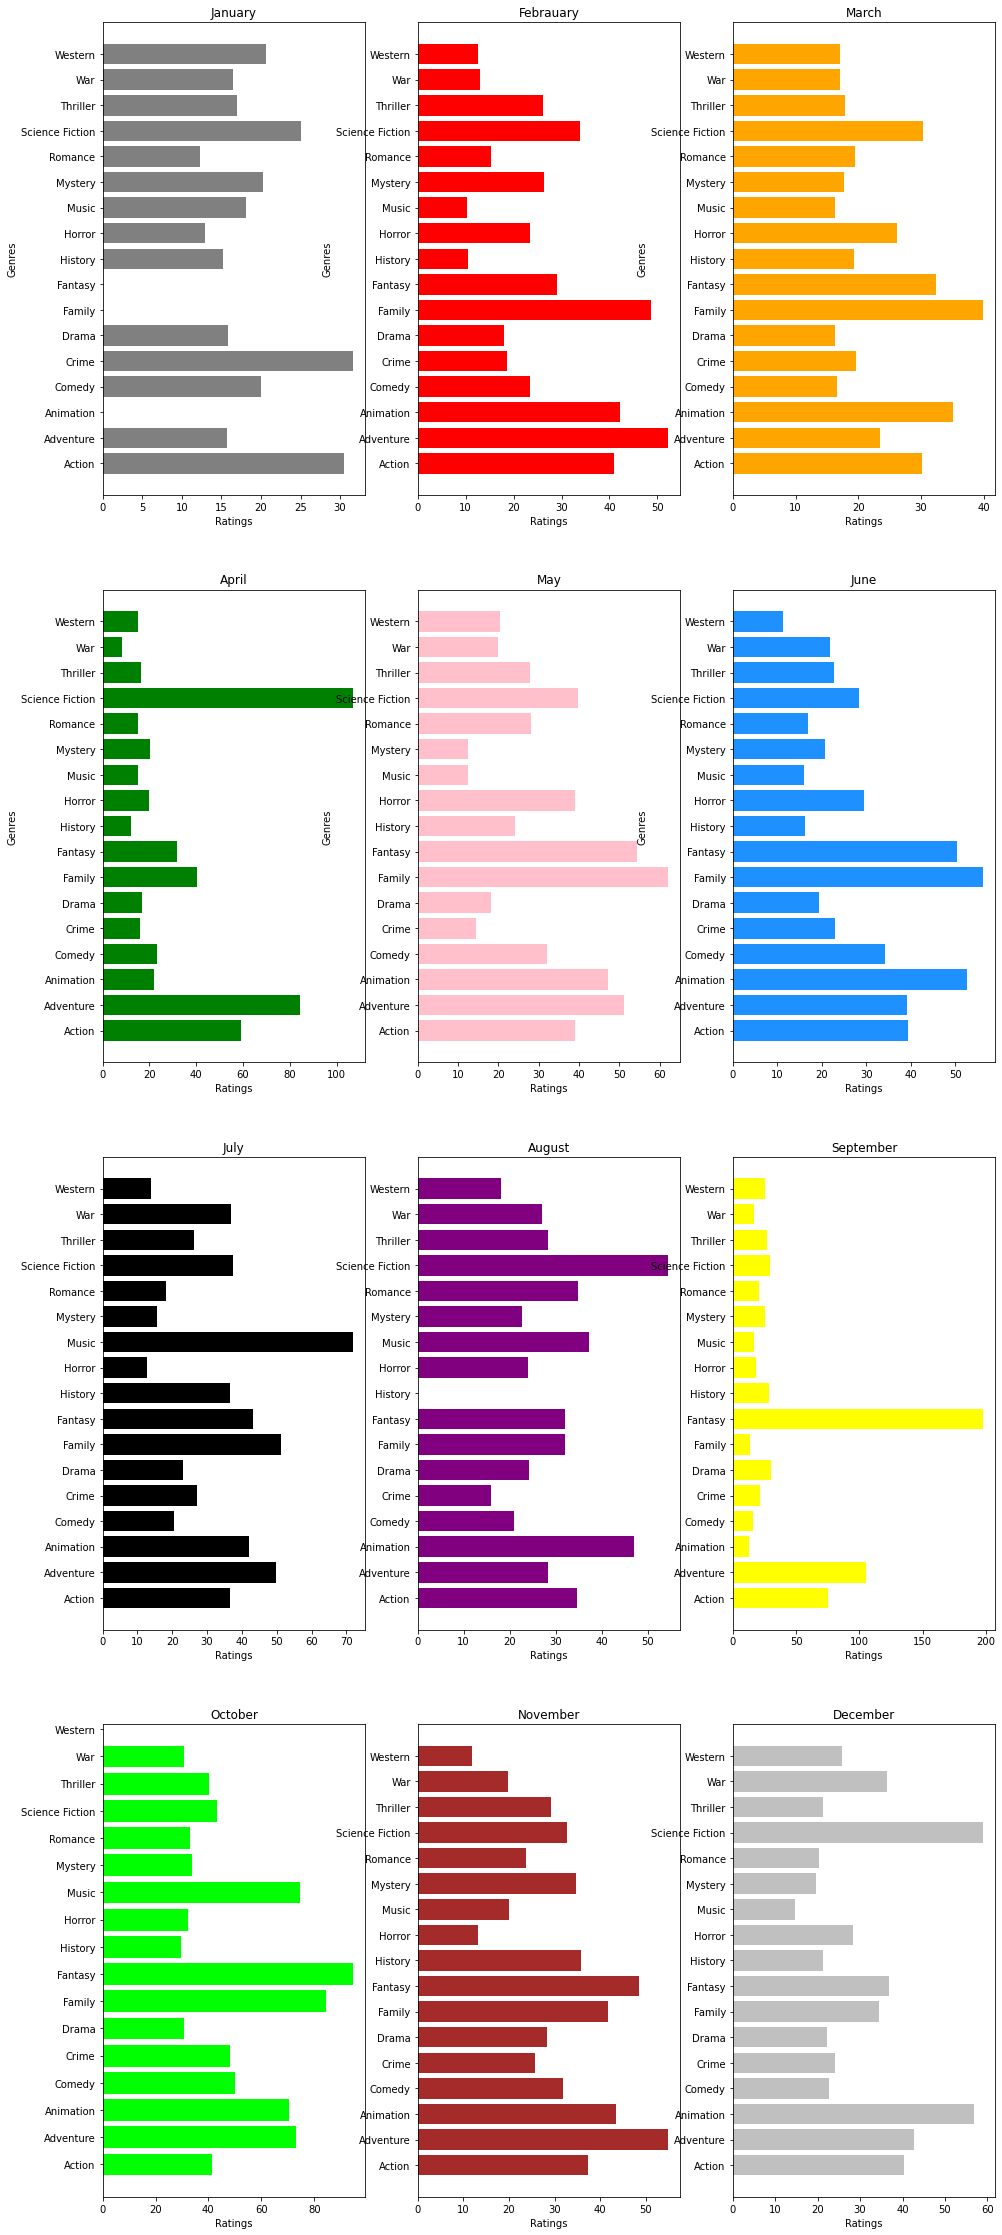

In [57]:
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Ratings')
axes[0][1].set_xlabel('Ratings')
axes[0][2].set_xlabel('Ratings')
axes[1][0].set_xlabel('Ratings')
axes[1][1].set_xlabel('Ratings')
axes[1][2].set_xlabel('Ratings')
axes[2][0].set_xlabel('Ratings')
axes[2][1].set_xlabel('Ratings')
axes[2][2].set_xlabel('Ratings')
axes[3][0].set_xlabel('Ratings')
axes[3][1].set_xlabel('Ratings')
axes[3][2].set_xlabel('Ratings')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')

x = month_genre_popularity.index
Jan = month_genre_popularity[1]
Feb = month_genre_popularity[2]
Mar = month_genre_popularity[3]
Apr = month_genre_popularity[4]
May = month_genre_popularity[5]
June = month_genre_popularity[6]
July = month_genre_popularity[7]
Aug = month_genre_popularity[8]
Sep = month_genre_popularity[9]
Oct = month_genre_popularity[10]
Nov = month_genre_popularity[11]
Dec = month_genre_popularity[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

# # axes.tick_params(labelrotation=45)
# for tick in axes.get_xticklabels():
#     tick.set_rotation(45)

In [58]:
month_genre_rating.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre_ids')

In [59]:
month_genre_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Action to Western
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       14 non-null     float64
 1   2       17 non-null     float64
 2   3       17 non-null     float64
 3   4       17 non-null     float64
 4   5       17 non-null     float64
 5   6       17 non-null     float64
 6   7       17 non-null     float64
 7   8       16 non-null     float64
 8   9       17 non-null     float64
 9   10      16 non-null     float64
 10  11      17 non-null     float64
 11  12      17 non-null     float64
dtypes: float64(12)
memory usage: 1.7+ KB


# GRAPH
## graph
### graph

<BarContainer object of 17 artists>

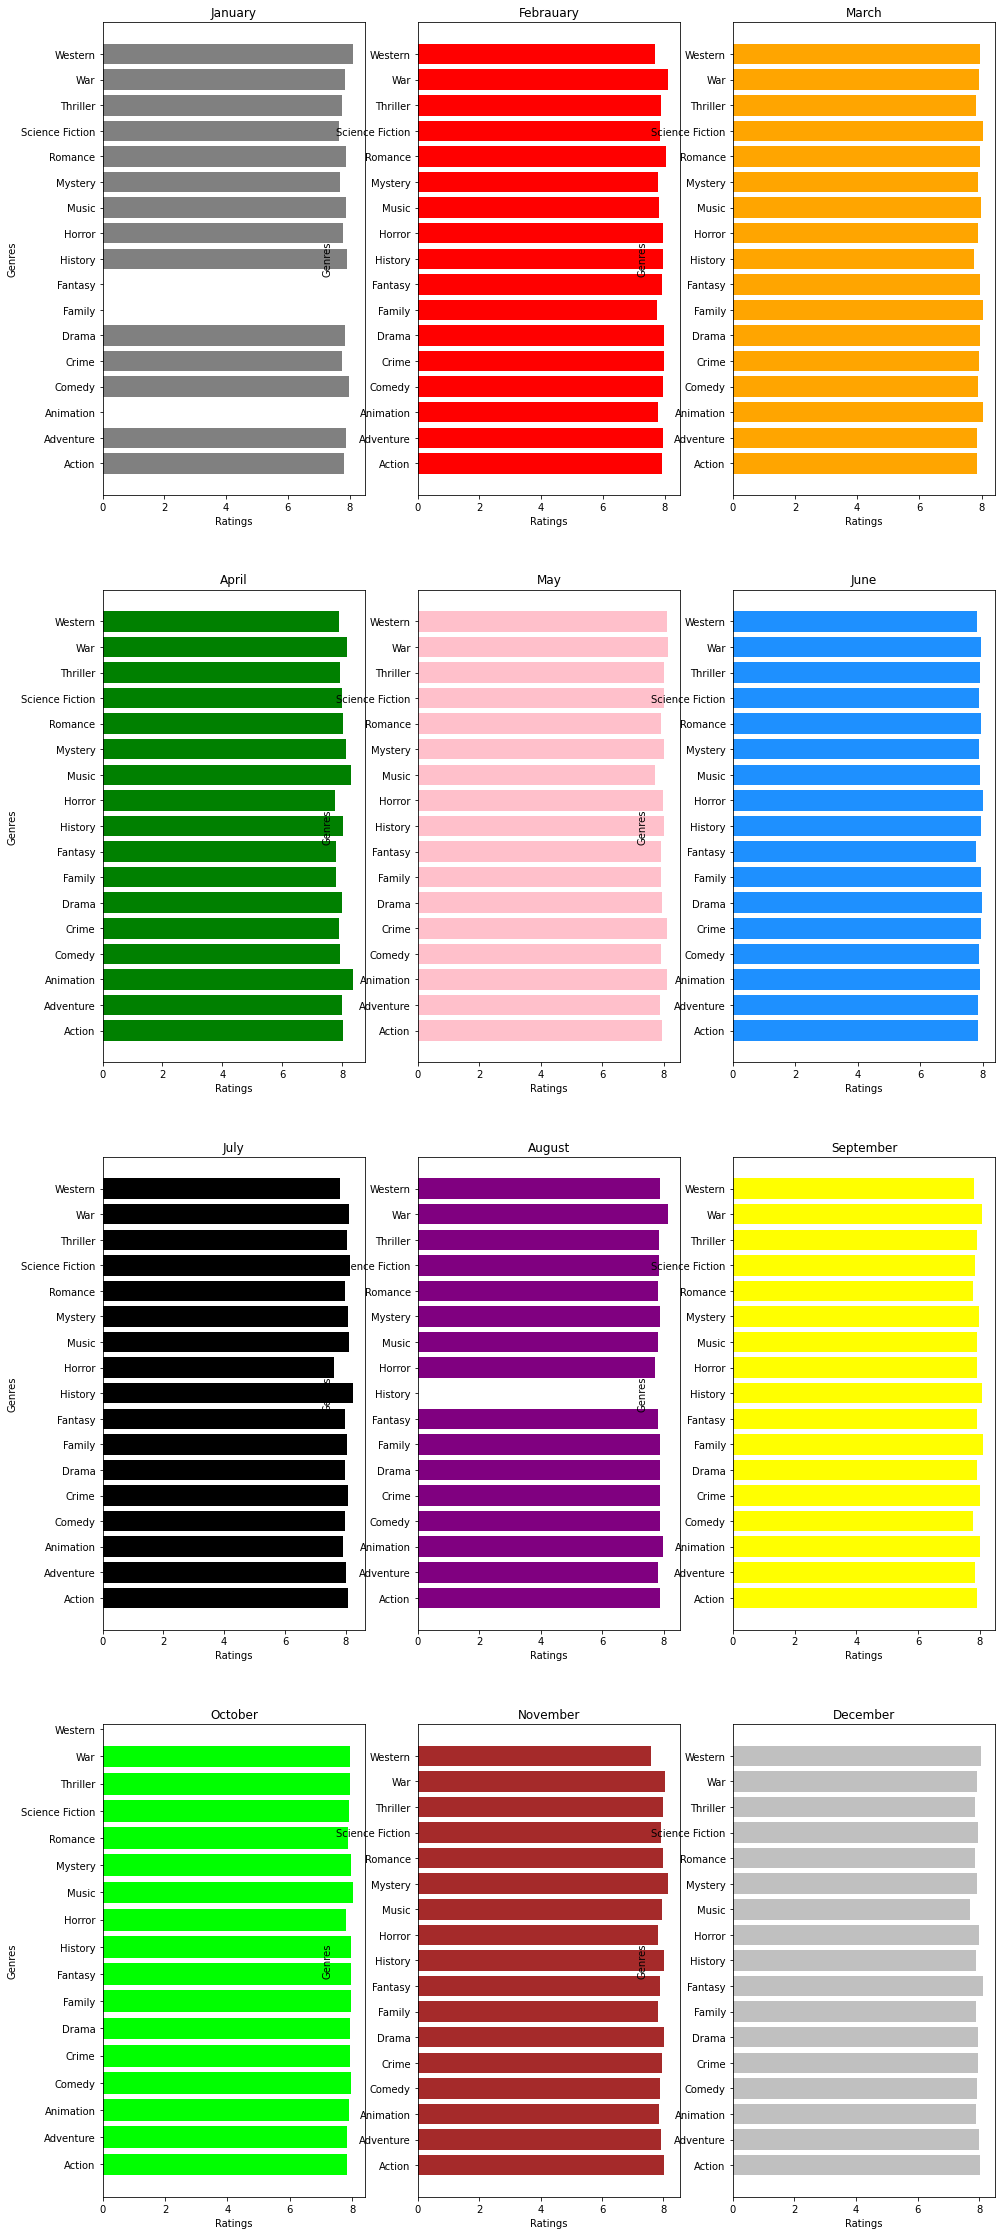

In [60]:
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Ratings')
axes[0][1].set_xlabel('Ratings')
axes[0][2].set_xlabel('Ratings')
axes[1][0].set_xlabel('Ratings')
axes[1][1].set_xlabel('Ratings')
axes[1][2].set_xlabel('Ratings')
axes[2][0].set_xlabel('Ratings')
axes[2][1].set_xlabel('Ratings')
axes[2][2].set_xlabel('Ratings')
axes[3][0].set_xlabel('Ratings')
axes[3][1].set_xlabel('Ratings')
axes[3][2].set_xlabel('Ratings')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')
axes[2][0].set_ylabel('Genres')
axes[2][1].set_ylabel('Genres')
axes[2][2].set_ylabel('Genres')
axes[3][0].set_ylabel('Genres')
axes[3][1].set_ylabel('Genres')
axes[3][2].set_ylabel('Genres')

x = month_genre_rating.index
Jan = month_genre_rating[1]
Feb = month_genre_rating[2]
Mar = month_genre_rating[3]
Apr = month_genre_rating[4]
May = month_genre_rating[5]
June = month_genre_rating[6]
July = month_genre_rating[7]
Aug = month_genre_rating[8]
Sep = month_genre_rating[9]
Oct = month_genre_rating[10]
Nov = month_genre_rating[11]
Dec = month_genre_rating[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

<BarContainer object of 17 artists>

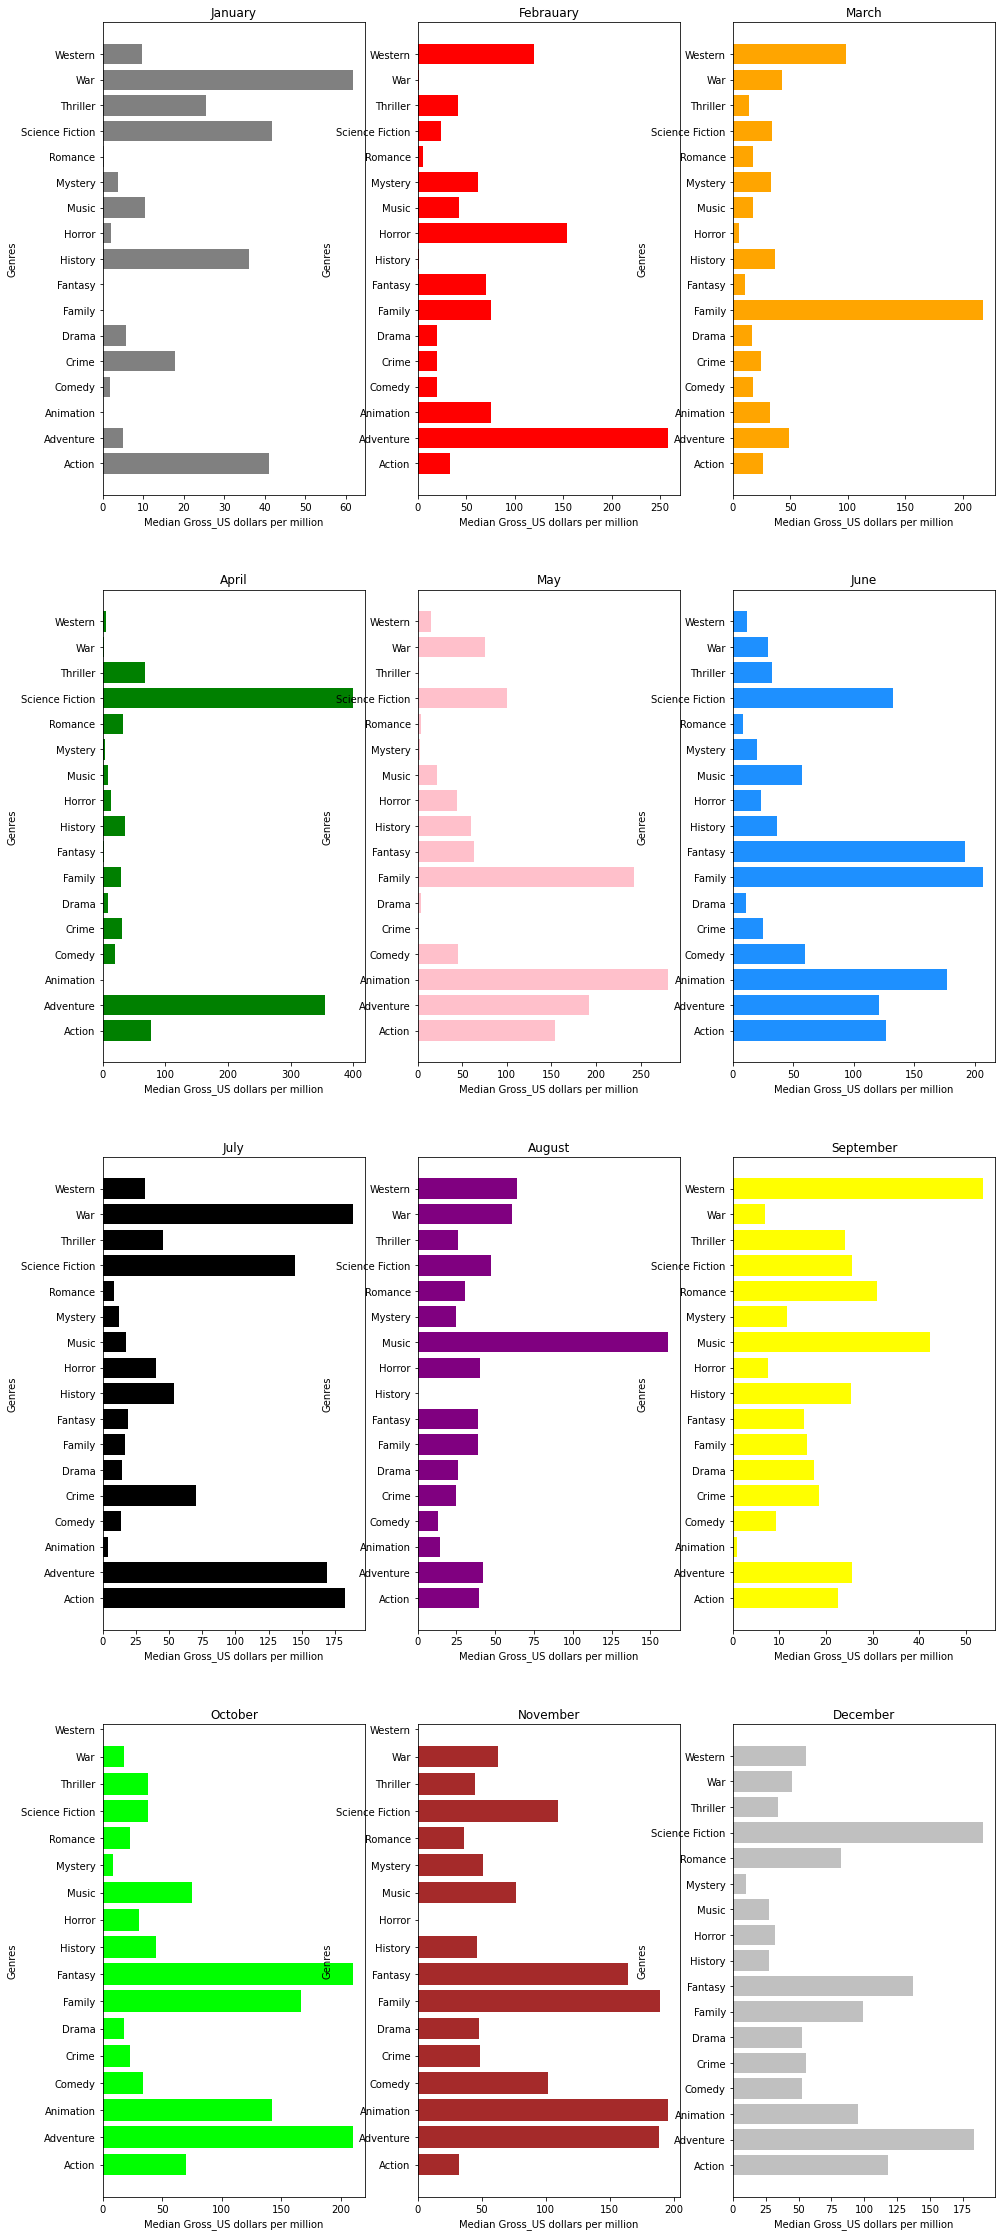

In [61]:
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].median().unstack().transpose()
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Median Gross_US dollars per million')
axes[0][1].set_xlabel('Median Gross_US dollars per million')
axes[0][2].set_xlabel('Median Gross_US dollars per million')
axes[1][0].set_xlabel('Median Gross_US dollars per million')
axes[1][1].set_xlabel('Median Gross_US dollars per million')
axes[1][2].set_xlabel('Median Gross_US dollars per million')
axes[2][0].set_xlabel('Median Gross_US dollars per million')
axes[2][1].set_xlabel('Median Gross_US dollars per million')
axes[2][2].set_xlabel('Median Gross_US dollars per million')
axes[3][0].set_xlabel('Median Gross_US dollars per million')
axes[3][1].set_xlabel('Median Gross_US dollars per million')
axes[3][2].set_xlabel('Median Gross_US dollars per million')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')
axes[2][0].set_ylabel('Genres')
axes[2][1].set_ylabel('Genres')
axes[2][2].set_ylabel('Genres')
axes[3][0].set_ylabel('Genres')
axes[3][1].set_ylabel('Genres')
axes[3][2].set_ylabel('Genres')

x = month_genre_gross_median.index
Jan = month_genre_gross_median[1]
Feb = month_genre_gross_median[2]
Mar = month_genre_gross_median[3]
Apr = month_genre_gross_median[4]
May = month_genre_gross_median[5]
June = month_genre_gross_median[6]
July = month_genre_gross_median[7]
Aug = month_genre_gross_median[8]
Sep = month_genre_gross_median[9]
Oct = month_genre_gross_median[10]
Nov = month_genre_gross_median[11]
Dec = month_genre_gross_median[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

<BarContainer object of 17 artists>

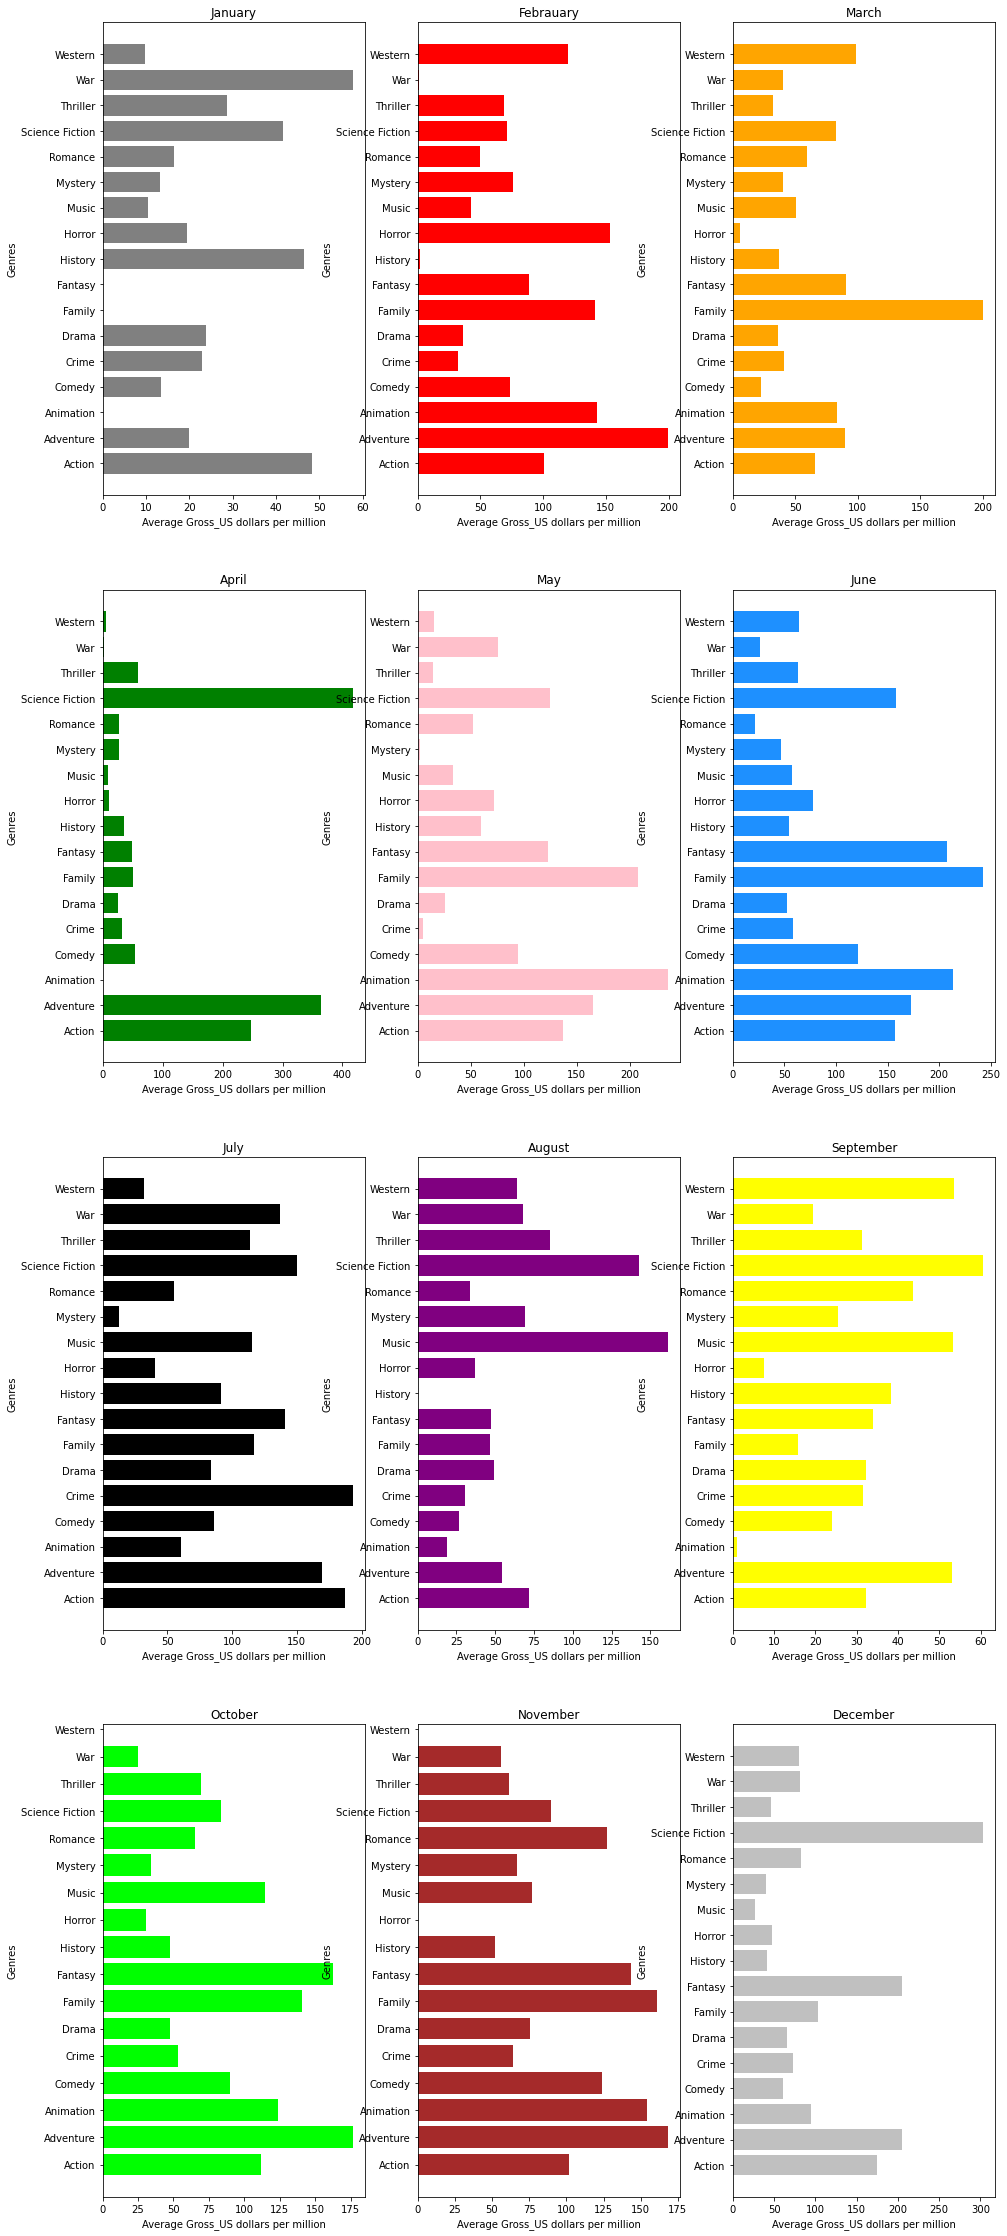

In [200]:
month_genre_gross_median = combo.groupby(['month', 'genre_ids'])['gross_us'].mean().unstack().transpose()
fig , axes = plt.subplots(4,3, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[0][2].set_title('March')
axes[1][0].set_title('April')
axes[1][1].set_title('May')
axes[1][2].set_title('June')
axes[2][0].set_title('July')
axes[2][1].set_title('August')
axes[2][2].set_title('September')
axes[3][0].set_title('October')
axes[3][1].set_title('November')
axes[3][2].set_title('December')

axes[0][0].set_xlabel('Average Gross_US dollars per million')
axes[0][1].set_xlabel('Average Gross_US dollars per million')
axes[0][2].set_xlabel('Average Gross_US dollars per million')
axes[1][0].set_xlabel('Average Gross_US dollars per million')
axes[1][1].set_xlabel('Average Gross_US dollars per million')
axes[1][2].set_xlabel('Average Gross_US dollars per million')
axes[2][0].set_xlabel('Average Gross_US dollars per million')
axes[2][1].set_xlabel('Average Gross_US dollars per million')
axes[2][2].set_xlabel('Average Gross_US dollars per million')
axes[3][0].set_xlabel('Average Gross_US dollars per million')
axes[3][1].set_xlabel('Average Gross_US dollars per million')
axes[3][2].set_xlabel('Average Gross_US dollars per million')

axes[0][0].set_ylabel('Genres')
axes[0][1].set_ylabel('Genres')
axes[0][2].set_ylabel('Genres')
axes[1][0].set_ylabel('Genres')
axes[1][1].set_ylabel('Genres')
axes[1][2].set_ylabel('Genres')
axes[2][0].set_ylabel('Genres')
axes[2][1].set_ylabel('Genres')
axes[2][2].set_ylabel('Genres')
axes[3][0].set_ylabel('Genres')
axes[3][1].set_ylabel('Genres')
axes[3][2].set_ylabel('Genres')

x = month_genre_gross_median.index
Jan = month_genre_gross_median[1]
Feb = month_genre_gross_median[2]
Mar = month_genre_gross_median[3]
Apr = month_genre_gross_median[4]
May = month_genre_gross_median[5]
June = month_genre_gross_median[6]
July = month_genre_gross_median[7]
Aug = month_genre_gross_median[8]
Sep = month_genre_gross_median[9]
Oct = month_genre_gross_median[10]
Nov = month_genre_gross_median[11]
Dec = month_genre_gross_median[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[0][2].barh(x, Mar, color = 'orange')
axes[1][0].barh(x, Apr, color = 'green')
axes[1][1].barh(x, May, color = 'pink')
axes[1][2].barh(x, June, color = 'dodgerblue')
axes[2][0].barh(x, July, color = 'black')
axes[2][1].barh(x, Aug, color = 'purple')
axes[2][2].barh(x, Sep, color = 'yellow')
axes[3][0].barh(x, Oct, color = 'lime')
axes[3][1].barh(x, Nov, color = 'brown')
axes[3][2].barh(x, Dec, color = 'silver')

List of things for thurs:
    figure out how to scale graphs,
    assign colors to genre as oppose to month
   

<BarContainer object of 17 artists>

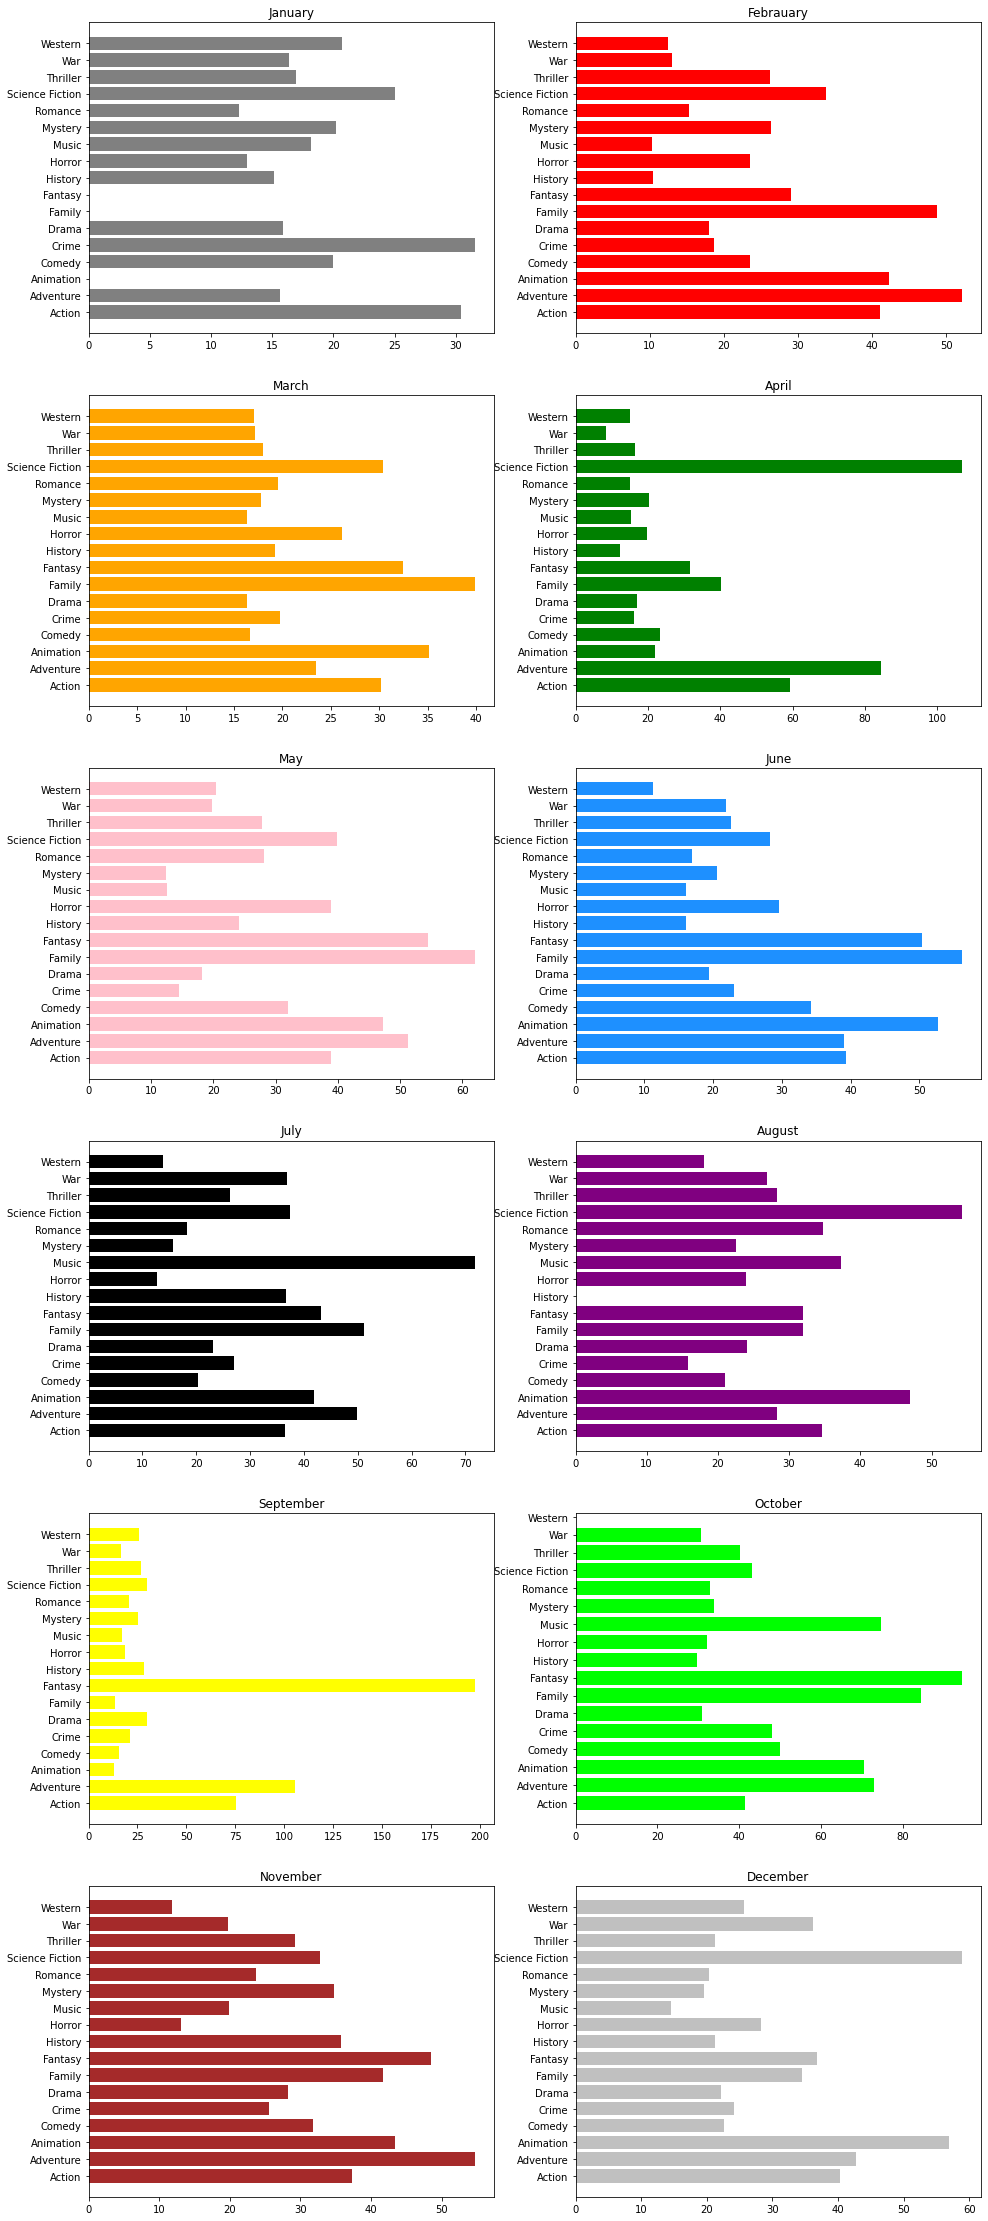

In [68]:
fig , axes = plt.subplots(6,2, figsize = (16,40))

axes[0][0].set_title('January')
axes[0][1].set_title('Febrauary')
axes[1][0].set_title('March')
axes[1][1].set_title('April')
axes[2][0].set_title('May')
axes[2][1].set_title('June')
axes[3][0].set_title('July')
axes[3][1].set_title('August')
axes[4][0].set_title('September')
axes[4][1].set_title('October')
axes[5][0].set_title('November')
axes[5][1].set_title('December')

# axes[0][0].set_xlabel('Ratings')
# axes[0][1].set_xlabel('Ratings')
# axes[0][2].set_xlabel('Ratings')
# axes[1][0].set_xlabel('Ratings')
# axes[1][1].set_xlabel('Ratings')
# axes[1][2].set_xlabel('Ratings')
# axes[2][0].set_xlabel('Ratings')
# axes[2][1].set_xlabel('Ratings')
# axes[2][2].set_xlabel('Ratings')
# axes[3][0].set_xlabel('Ratings')
# axes[3][1].set_xlabel('Ratings')
# axes[3][2].set_xlabel('Ratings')

# axes[0][0].set_ylabel('Genres')
# axes[0][1].set_ylabel('Genres')
# axes[0][2].set_ylabel('Genres')
# axes[1][0].set_ylabel('Genres')
# axes[1][1].set_ylabel('Genres')
# axes[1][2].set_ylabel('Genres')

x = month_genre_popularity.index
Jan = month_genre_popularity[1]
Feb = month_genre_popularity[2]
Mar = month_genre_popularity[3]
Apr = month_genre_popularity[4]
May = month_genre_popularity[5]
June = month_genre_popularity[6]
July = month_genre_popularity[7]
Aug = month_genre_popularity[8]
Sep = month_genre_popularity[9]
Oct = month_genre_popularity[10]
Nov = month_genre_popularity[11]
Dec = month_genre_popularity[12]

axes[0][0].barh(x, Jan, color = 'gray')
axes[0][1].barh(x, Feb, color = 'red')
axes[1][0].barh(x, Mar, color = 'orange')
axes[1][1].barh(x, Apr, color = 'green')
axes[2][0].barh(x, May, color = 'pink')
axes[2][1].barh(x, June, color = 'dodgerblue')
axes[3][0].barh(x, July, color = 'black')
axes[3][1].barh(x, Aug, color = 'purple')
axes[4][0].barh(x, Sep, color = 'yellow')
axes[4][1].barh(x, Oct, color = 'lime')
axes[5][0].barh(x, Nov, color = 'brown')
axes[5][1].barh(x, Dec, color = 'silver')

In [ ]:
#line
fig , axes = plt.subplots(6,2, figsize = (16,7))

x = month_genre_rating.index
Jan = month_genre_rating[1]
Feb = month_genre_rating[2]
Mar = month_genre_rating[3]
Apr = month_genre_rating[4]
May = month_genre_rating[5]
June = month_genre_rating[6]
July = month_genre_rating[7]
Aug = month_genre_rating[8]
Sep = month_genre_rating[9]
Oct = month_genre_rating[10]
Nov = month_genre_rating[11]
Dec = month_genre_rating[12]

In [69]:
#same genre on one graph - y: month, x:rating

In [71]:
len(genre)

19

In [83]:
month_genre_rating.transpose()

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,7.814286,7.900000,NaN,7.972727,7.750000,7.866667,NaN,NaN,7.916667,7.800000,7.900000,7.700000,7.887500,7.650000,7.750000,7.860000,8.100000
2,7.922222,7.960000,7.783333,7.945455,7.975000,7.973171,7.760000,7.900000,7.950000,7.942857,7.800000,7.785714,8.050000,7.833333,7.870588,8.100000,7.700000
3,7.850000,7.858333,8.033333,7.876923,7.911765,7.932500,8.033333,7.940000,7.766667,7.866667,7.975000,7.885714,7.960000,8.037500,7.823810,7.920000,7.933333
4,8.035294,7.981818,8.350000,7.921429,7.900000,7.992593,7.800000,7.800000,8.033333,7.766667,8.300000,8.120000,8.016667,8.000000,7.918182,8.150000,7.900000
5,7.940000,7.894444,8.100000,7.917647,8.100000,7.934884,7.900000,7.900000,8.000000,7.966667,7.733333,8.000000,7.907143,8.011111,8.000000,8.133333,8.100000
6,7.835714,7.835000,7.912500,7.872000,7.928571,7.968333,7.925000,7.790000,7.950000,8.000000,7.900000,7.866667,7.933333,7.891667,7.908696,7.950000,7.800000
7,8.066667,8.016667,7.916667,7.963158,8.077778,7.966667,8.027273,7.984615,8.225000,7.600000,8.100000,8.066667,7.963636,8.150000,8.047368,8.100000,7.800000
8,7.861538,7.808333,7.980000,7.870000,7.881250,7.885714,7.887500,7.800000,NaN,7.700000,7.800000,7.876923,7.820000,7.833333,7.845833,8.125000,7.866667
9,7.894118,7.836364,8.000000,7.784211,7.993103,7.905435,8.100000,7.900000,8.069231,7.900000,7.900000,7.966667,7.790000,7.857143,7.910000,8.066667,7.800000


<BarContainer object of 17 artists>

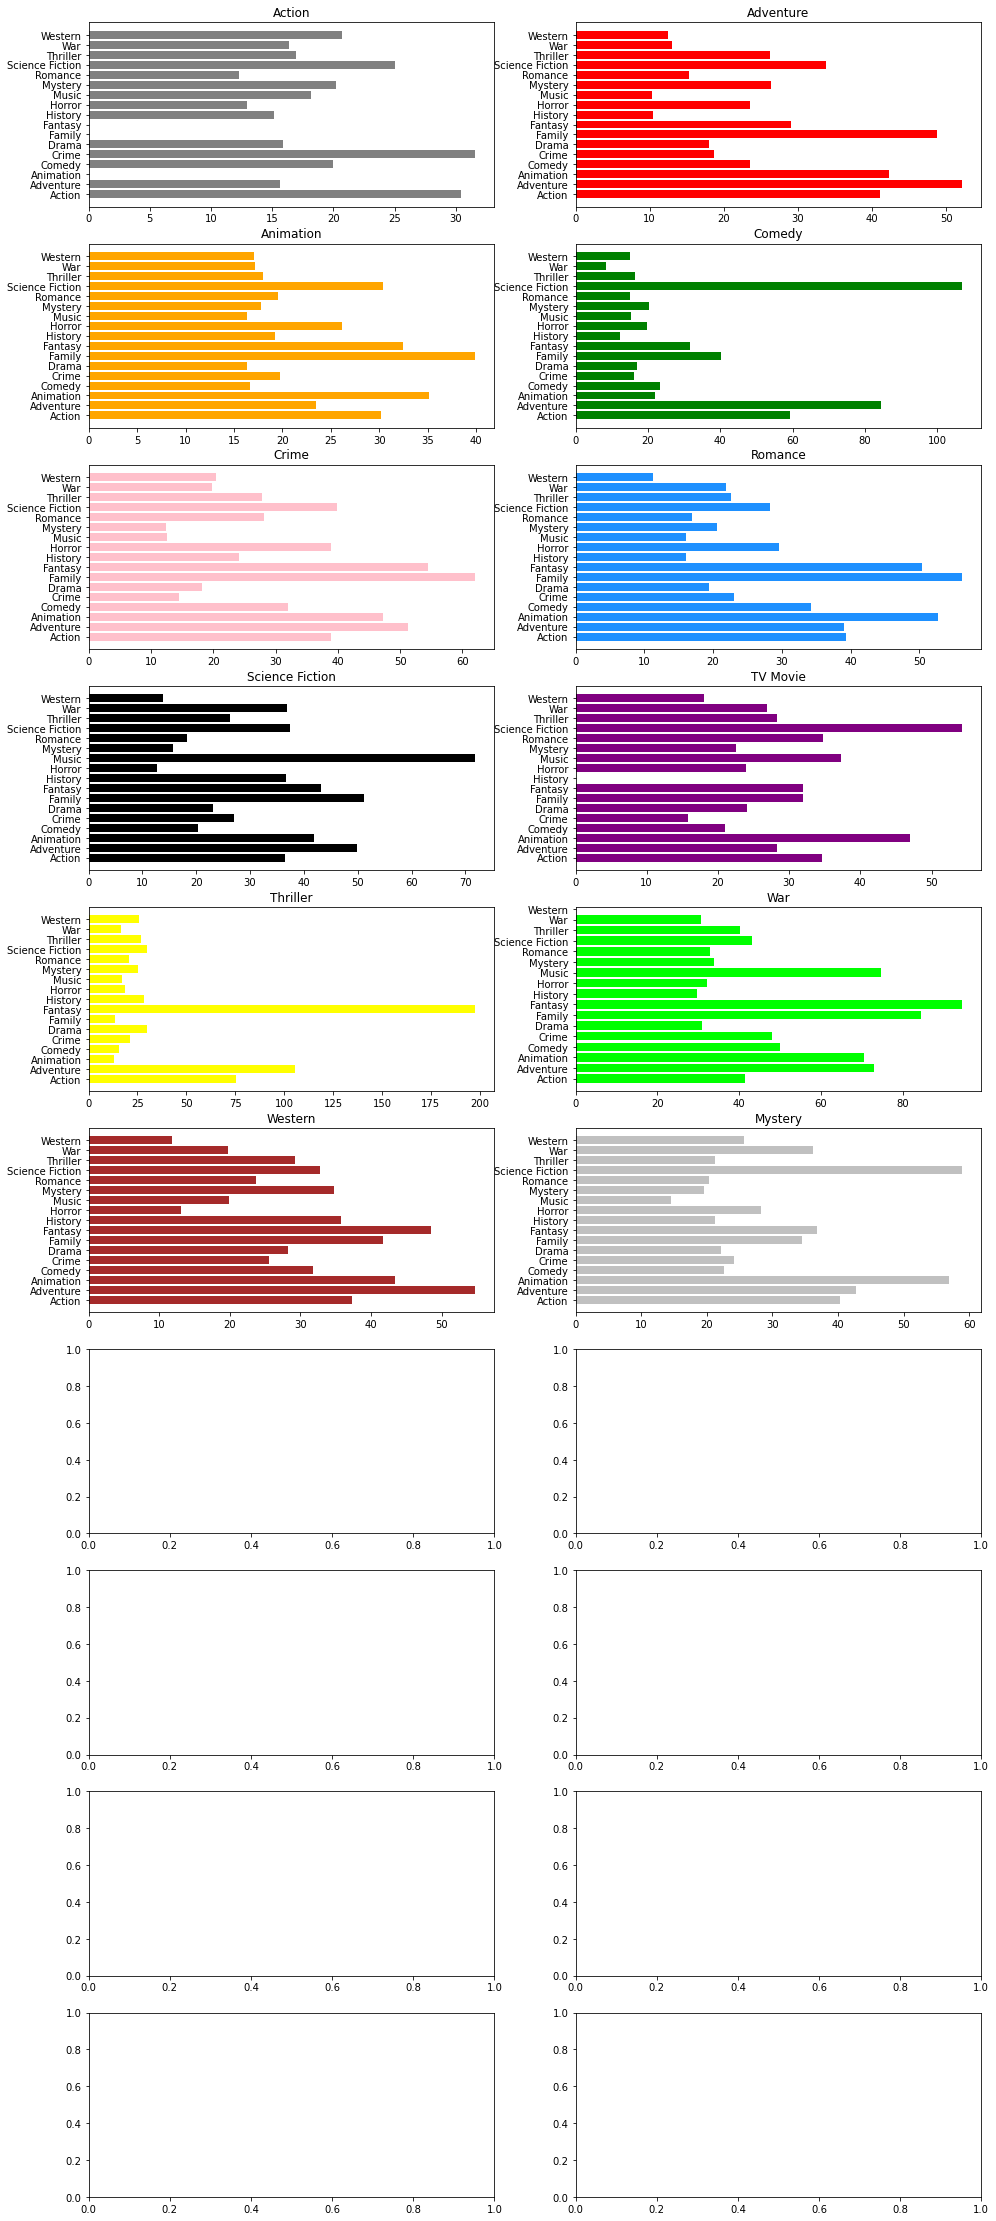

In [72]:
fig , axes = plt.subplots(10,2, figsize = (16,40))

axes[0][0].set_title('Action')
axes[0][1].set_title('Adventure')
axes[1][0].set_title('Animation')
axes[1][1].set_title('Comedy')
axes[2][0].set_title('Crime')
axes[2][1].set_title('Documentary')
axes[3][0].set_title('Drama')
axes[3][1].set_title('Family')
axes[4][0].set_title('Fantasy')
axes[4][1].set_title('History')
axes[5][0].set_title('Music')
axes[5][1].set_title('Mystery')
axes[6][0].set_title('Romance')
axes[6][1].set_title('Science Fiction')
axes[7][0].set_title('TV Movie')
axes[7][1].set_title('Thriller')
axes[8][0].set_title('War')
axes[8][1].set_title('Western')

axes[0][0].set_xlabel('Ratings')
axes[0][1].set_xlabel('Ratings')
axes[1][0].set_xlabel('Ratings')
axes[1][1].set_xlabel('Ratings')
axes[2][0].set_xlabel('Ratings')
axes[2][1].set_xlabel('Ratings')
axes[3][0].set_xlabel('Ratings')
axes[3][1].set_xlabel('Ratings')
axes[4][0].set_xlabel('Ratings')
axes[4][1].set_xlabel('Ratings')
axes[5][0].set_xlabel('Ratings')
axes[5][1].set_xlabel('Ratings')
axes[6][0].set_xlabel('Ratings')
axes[6][1].set_xlabel('Ratings')
axes[7][0].set_xlabel('Ratings')
axes[7][1].set_xlabel('Ratings')
axes[8][0].set_xlabel('Ratings')
axes[8][1].set_xlabel('Ratings')

axes[0][0].set_ylabel('Month')
axes[0][1].set_ylabel('Month')
axes[1][0].set_ylabel('Month')
axes[1][1].set_ylabel('Month')
axes[2][0].set_ylabel('Month')
axes[2][1].set_ylabel('Month')
axes[3][0].set_ylabel('Month')
axes[3][1].set_ylabel('Month')
axes[4][0].set_ylabel('Month')
axes[4][1].set_ylabel('Month')
axes[5][0].set_ylabel('Month')
axes[5][1].set_ylabel('Month')
axes[6][0].set_ylabel('Month')
axes[6][1].set_ylabel('Month')
axes[7][0].set_ylabel('Month')
axes[7][1].set_ylabel('Month')
axes[8][0].set_ylabel('Month')
axes[8][1].set_ylabel('Month')

y = month_genre_rating.index
month_genre_rating['Action']
month_genre_rating['Adventure']
month_genre_rating['Animation']
month_genre_rating['Comedy']
month_genre_rating['Crime']
month_genre_rating['Documentary']
month_genre_rating['Drama']
month_genre_rating['Family']
month_genre_rating['Fantasy']
month_genre_rating['History']
month_genre_rating['Music']
month_genre_rating['Mystery']
month_genre_rating['Romance'
month_genre_rating['Science Fiction']
month_genre_rating['TV Movie']
month_genre_rating['Thriller']
month_genre_rating['War']
month_genre_rating['Western']

axes[0][0].barh(x, y, color = 'gray')
axes[0][1].barh(x, y, color = 'red')
axes[1][0].barh(x, y, color = 'orange')
axes[1][1].barh(x, y, color = 'green')
axes[2][0].barh(x, y, color = 'pink')
axes[2][1].barh(x, y, color = 'dodgerblue')
axes[3][0].barh(x, y, color = 'black')
axes[3][1].barh(x, y, color = 'purple')
axes[4][0].barh(x, y, color = 'yellow')
axes[4][1].barh(x, y, color = 'lime')
axes[5][0].barh(x, y, color = 'brown')
axes[5][1].barh(x, y, color = 'silver')

In [125]:
data = month_genre_rating.transpose()

In [126]:
data

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,7.814286,7.900000,NaN,7.972727,7.750000,7.866667,NaN,NaN,7.916667,7.800000,7.900000,7.700000,7.887500,7.650000,7.750000,7.860000,8.100000
2,7.922222,7.960000,7.783333,7.945455,7.975000,7.973171,7.760000,7.900000,7.950000,7.942857,7.800000,7.785714,8.050000,7.833333,7.870588,8.100000,7.700000
3,7.850000,7.858333,8.033333,7.876923,7.911765,7.932500,8.033333,7.940000,7.766667,7.866667,7.975000,7.885714,7.960000,8.037500,7.823810,7.920000,7.933333
4,8.035294,7.981818,8.350000,7.921429,7.900000,7.992593,7.800000,7.800000,8.033333,7.766667,8.300000,8.120000,8.016667,8.000000,7.918182,8.150000,7.900000
5,7.940000,7.894444,8.100000,7.917647,8.100000,7.934884,7.900000,7.900000,8.000000,7.966667,7.733333,8.000000,7.907143,8.011111,8.000000,8.133333,8.100000
6,7.835714,7.835000,7.912500,7.872000,7.928571,7.968333,7.925000,7.790000,7.950000,8.000000,7.900000,7.866667,7.933333,7.891667,7.908696,7.950000,7.800000
7,8.066667,8.016667,7.916667,7.963158,8.077778,7.966667,8.027273,7.984615,8.225000,7.600000,8.100000,8.066667,7.963636,8.150000,8.047368,8.100000,7.800000
8,7.861538,7.808333,7.980000,7.870000,7.881250,7.885714,7.887500,7.800000,NaN,7.700000,7.800000,7.876923,7.820000,7.833333,7.845833,8.125000,7.866667
9,7.894118,7.836364,8.000000,7.784211,7.993103,7.905435,8.100000,7.900000,8.069231,7.900000,7.900000,7.966667,7.790000,7.857143,7.910000,8.066667,7.800000


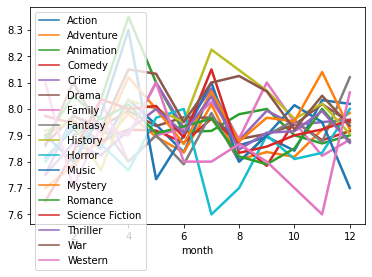

In [128]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5, dashes=False)

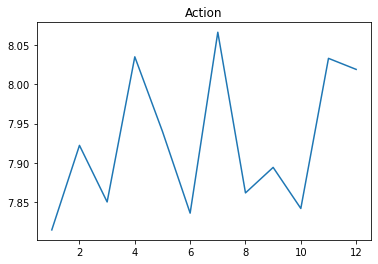

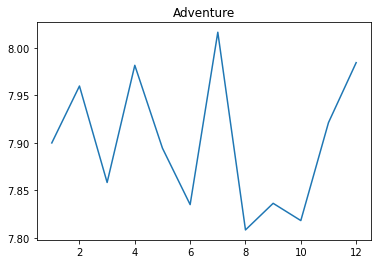

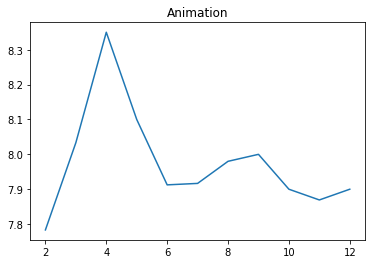

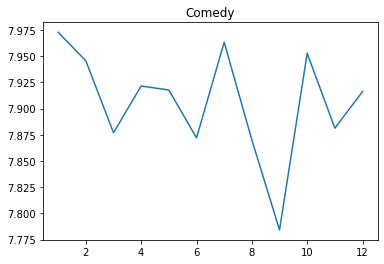

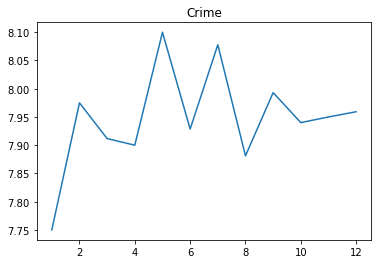

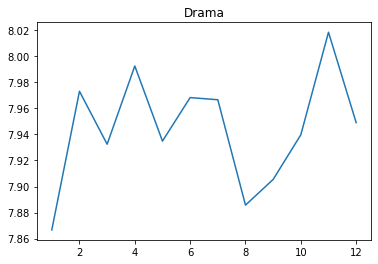

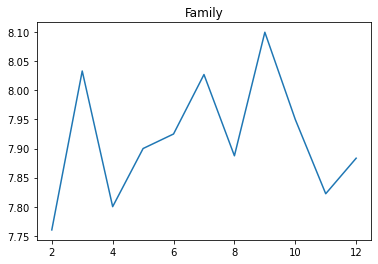

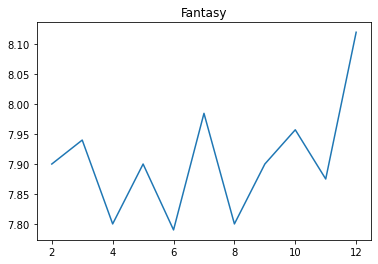

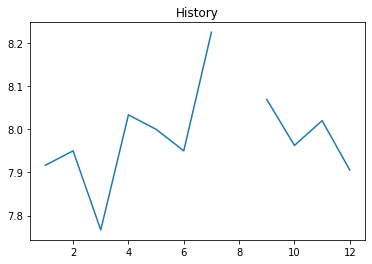

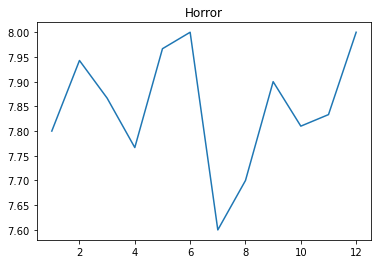

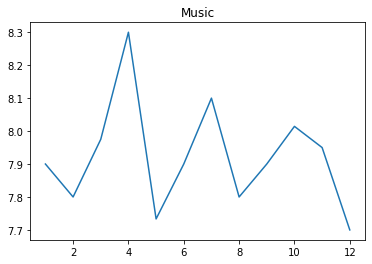

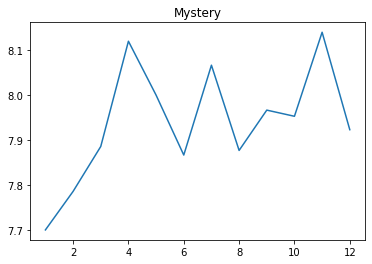

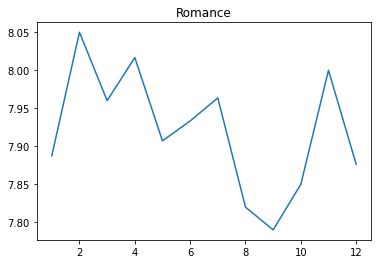

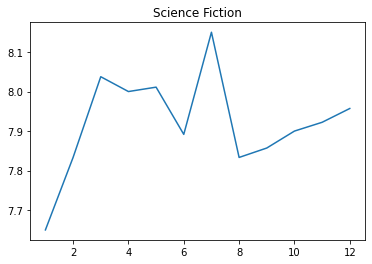

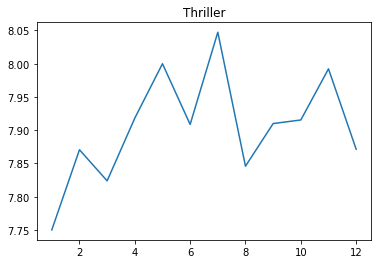

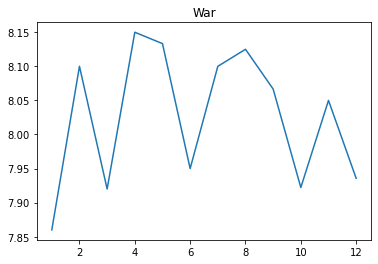

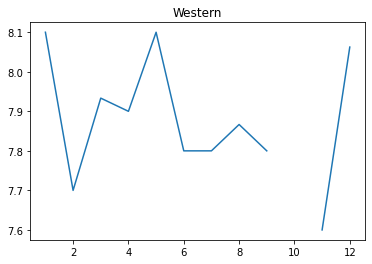

In [131]:
for col in data.columns:
    plt.plot(data.index, data[col].values)
    plt.title(col)
    plt.show()

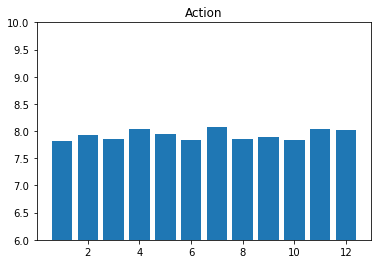

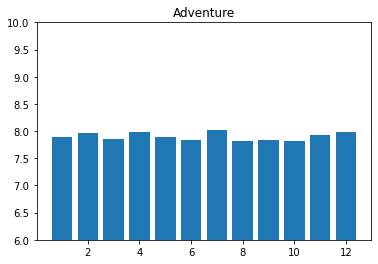

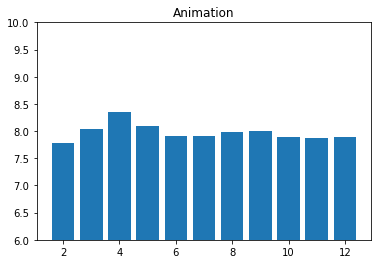

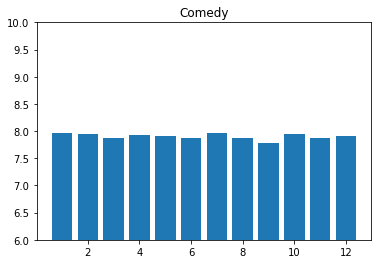

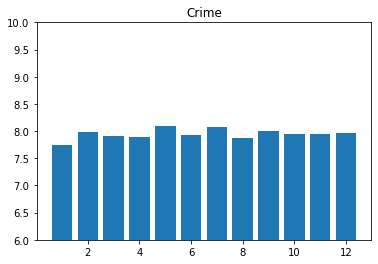

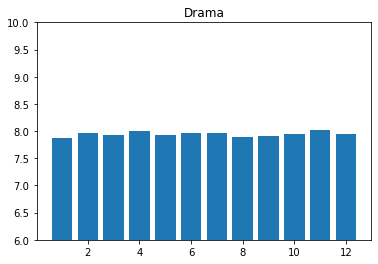

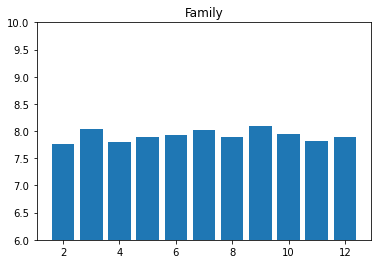

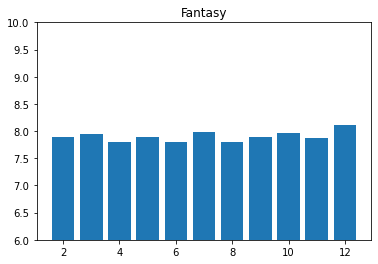

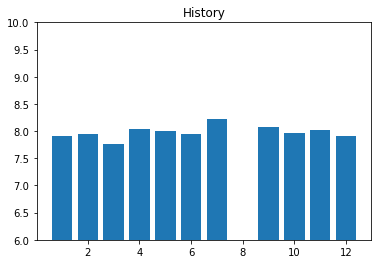

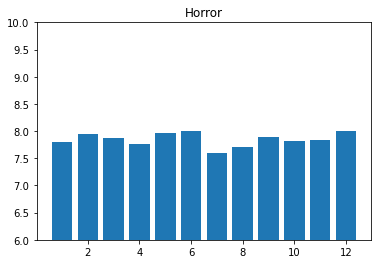

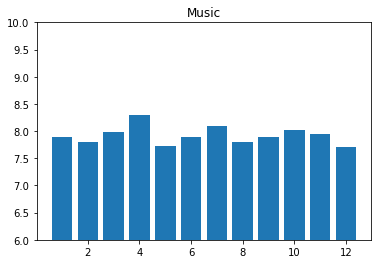

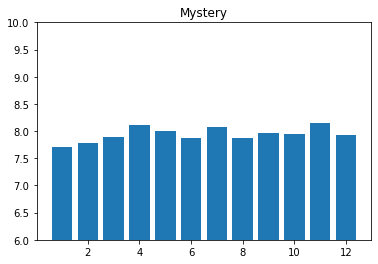

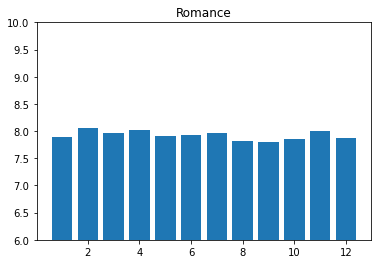

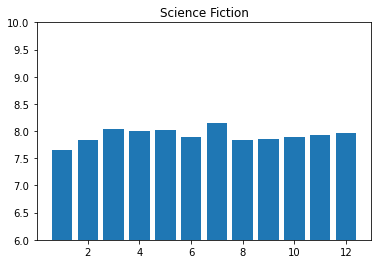

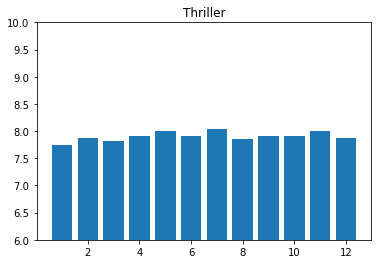

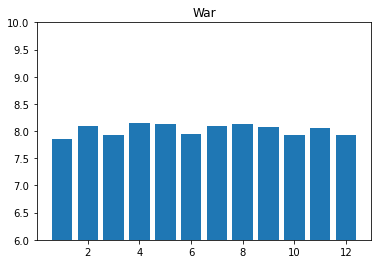

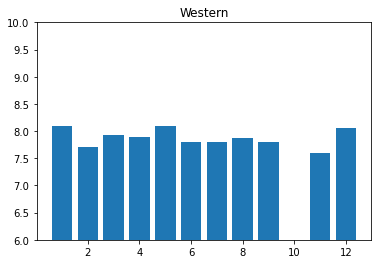

In [135]:
for col in data.columns:
    plt.bar(data.index, data[col].values)
    plt.ylim(6,10)
    plt.title(col)
    plt.show()

In [140]:
month_genre_gross_median = combo.groupby(['genre_ids','month'])['gross_us'].median().unstack().transpose()

In [141]:
month_genre_gross_median

genre_ids,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
month,,,,,,,,,,,,,,,,,
1,41.000,5.010,NaN,1.830,17.915,5.740,NaN,NaN,36.080,2.12,10.46,3.800,0.420,41.690,25.510,61.700,9.755
2,33.400,257.760,75.290,19.520,19.800,19.520,75.290,70.710,1.865,153.39,42.77,62.505,5.820,23.890,41.910,1.110,119.500
3,26.585,48.615,32.020,17.500,24.610,16.290,217.580,10.630,36.400,5.51,17.22,33.080,17.815,34.400,13.790,42.690,98.375
4,77.910,354.110,1.110,19.170,30.335,8.110,28.610,1.790,35.310,13.54,8.82,4.420,33.230,398.945,68.405,1.720,4.910
5,154.060,192.440,280.335,45.510,1.040,4.040,242.510,63.540,59.790,44.02,22.00,2.265,4.040,100.210,1.920,75.600,15.000
6,126.865,120.620,177.000,59.365,24.750,10.850,206.450,191.725,36.875,22.89,57.23,20.300,8.690,132.070,32.000,28.700,12.060
7,182.305,169.345,3.795,13.780,70.175,14.390,17.145,19.200,53.710,40.46,18.01,12.590,8.645,145.000,45.240,188.370,31.800
8,39.400,42.070,14.090,13.120,24.380,26.020,38.630,38.630,NaN,40.46,161.20,24.380,30.500,47.130,26.020,60.550,64.010
9,22.505,25.510,0.930,9.295,18.385,17.420,15.860,15.320,25.295,7.55,42.25,11.535,30.860,25.510,24.150,6.860,53.610


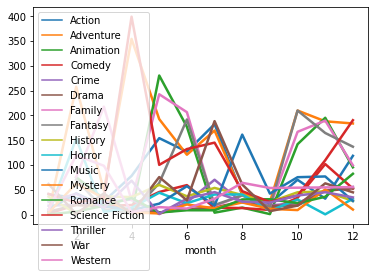

In [142]:
sns.lineplot(data=month_genre_gross_median, palette="tab10", linewidth=2.5, dashes=False)

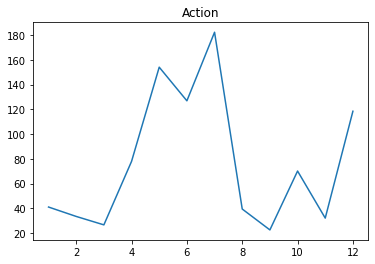

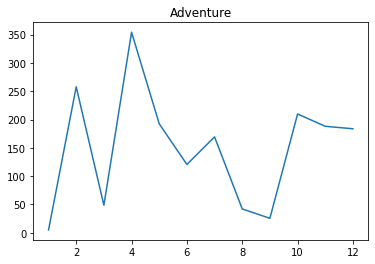

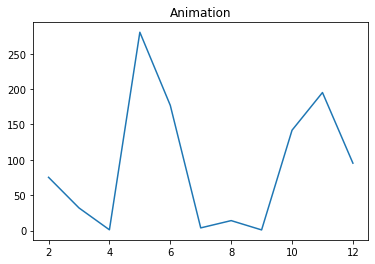

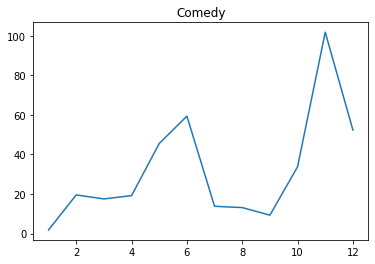

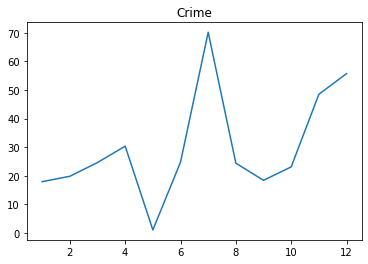

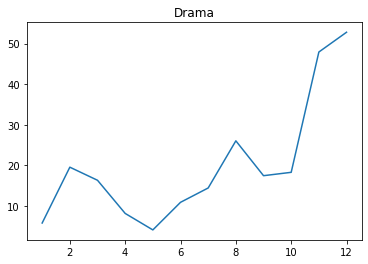

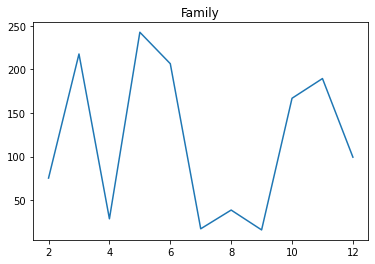

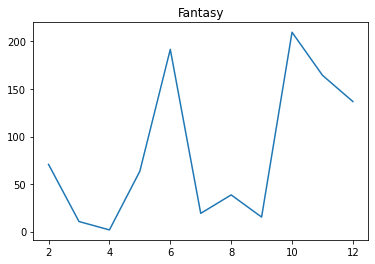

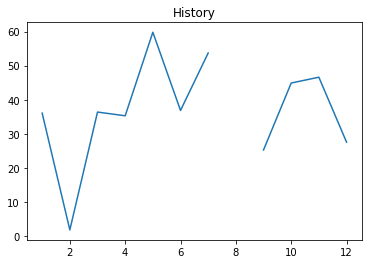

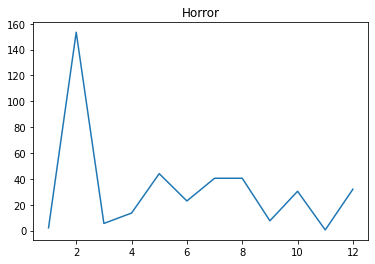

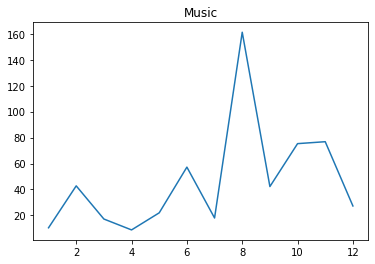

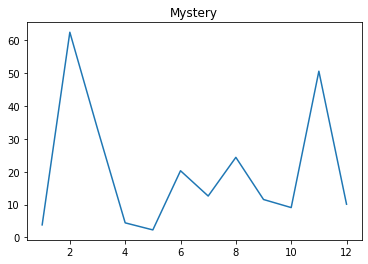

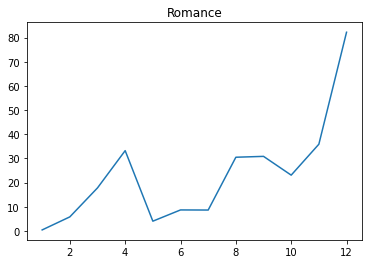

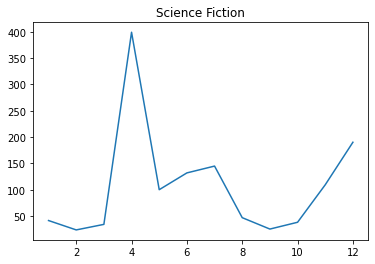

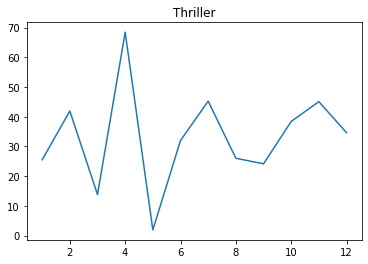

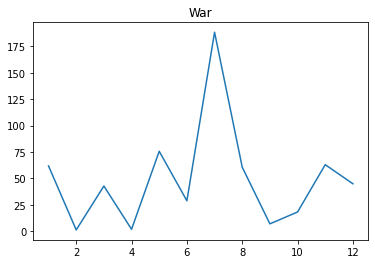

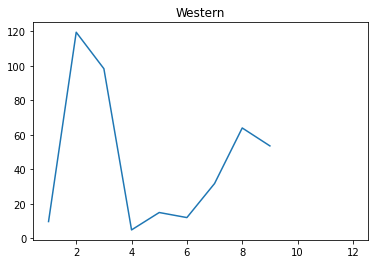

In [143]:
for col in month_genre_gross_median.columns:
    plt.plot(month_genre_gross_median.index, month_genre_gross_median[col].values)
    plt.title(col)
    plt.show()

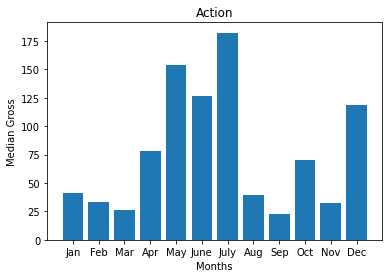

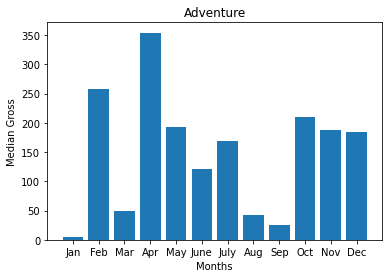

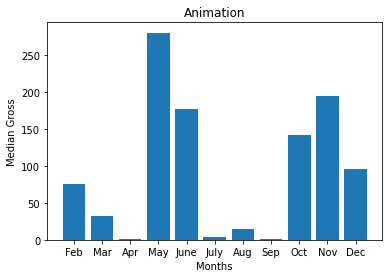

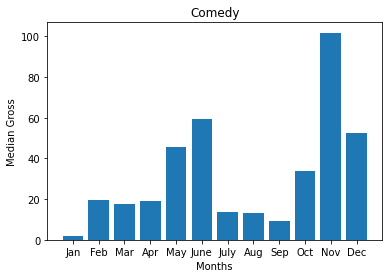

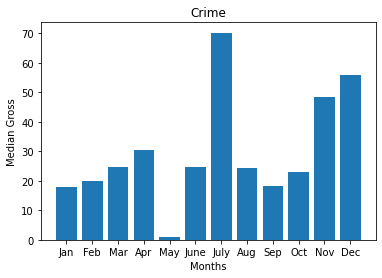

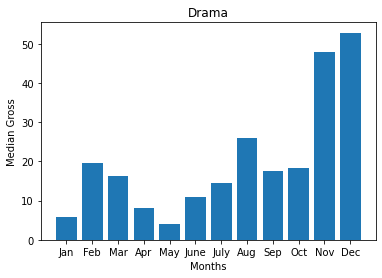

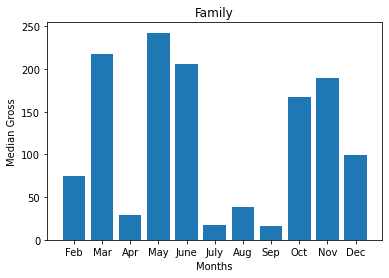

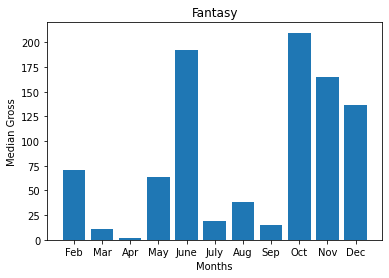

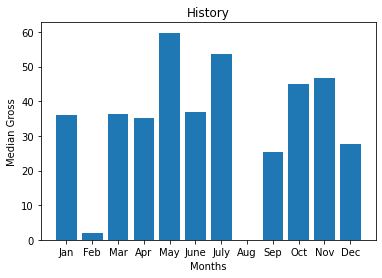

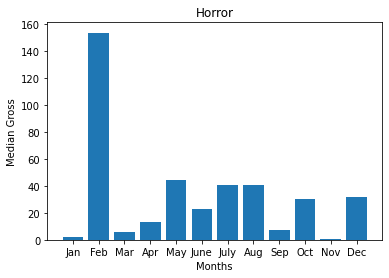

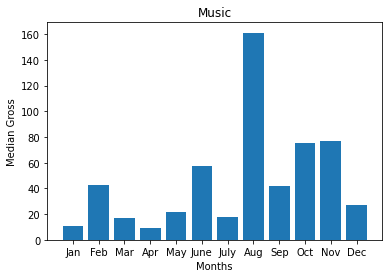

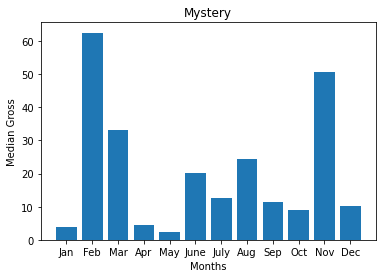

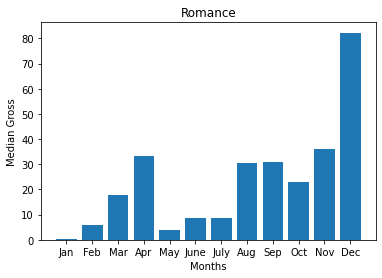

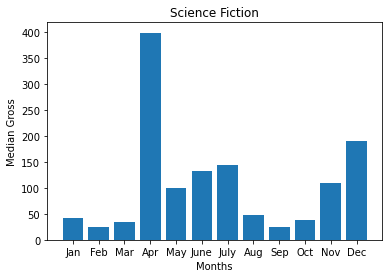

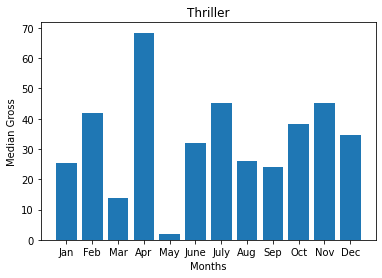

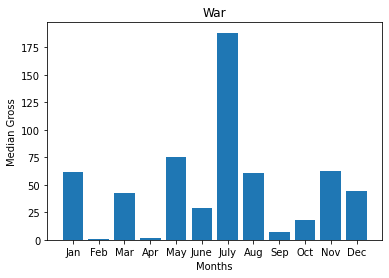

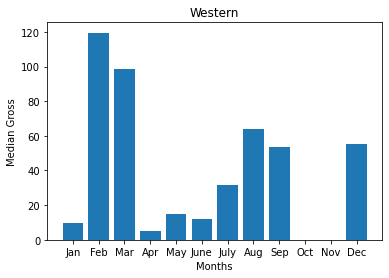

In [153]:
for col in month_genre_gross_median.columns:
    plt.bar(months, month_genre_gross_median[col].values)
    plt.title(col)
    plt.xlabel('Months')
    plt.ylabel('Median Gross')
    plt.show()

In [146]:
month_genre_gross_median.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

In [148]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']